In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
# Load picture in grayscale

I = cv2.imread('images/bird.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
gray_I = cv2.cvtColor(I,cv2.COLOR_RGB2GRAY)


### A) create mask

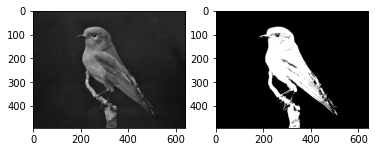

In [3]:
def show_origin_and_mask(src, treshold, METHOD=0):
    if METHOD == 0:
        mask = np.where(src<treshold, 0, 1) #first way
    else:
        mask = src>=treshold # second way
    plt.subplot(1, 2, 1)
    plt.imshow(src, cmap='gray')
    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')
    plt.show()

show_origin_and_mask(gray_I,52)

### B) create histogram

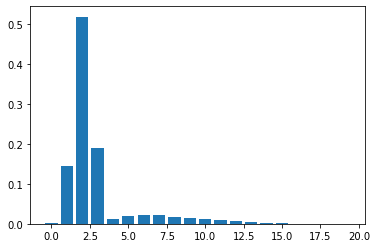

In [4]:
def myhist_faster(gray_src, n_bins):
    H = np.zeros(n_bins)
    step = 256 / n_bins
    reshape_src = gray_src.reshape(-1)
    for i in range(n_bins):
        mask = (reshape_src >= step * i) & (reshape_src < step * (i+1))
        H[i] = np.sum(mask)
    return H/np.sum(H)

def myhist(gray_src, n_bins):
    H = np.zeros(n_bins)
    bin_size = n_bins/255
    reshaped_src = gray_src.reshape(-1)
    for pixel in reshaped_src:
        H[int(pixel*bin_size)] +=1
    return H/np.sum(H)

n_bins = 20
H = myhist_faster(gray_I, n_bins)
plt.bar(range(n_bins), H)
plt.show()

**Question:** The histograms are usually normalized by dividing the result by the sum of all cells. Why is that?

Then the sum of all bins is 1 and the plot is probability distribution that random pixel belongs to the given bin

### C) Modified histogram function

min: 0 & max: 254


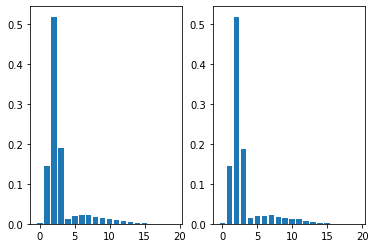

In [5]:
def myhist_modified(gray_src, n_bins):
    H = np.zeros(n_bins)
    reshape_src = gray_src.reshape(-1)
    max_val = max(reshape_src)
    min_val = min(reshape_src)
    print(f'min: {min_val} & max: {max_val}')
    step = (max_val - min_val) / n_bins
    for i in range(n_bins):
        mask = (reshape_src >= min_val + step * i) & (reshape_src < min_val + step * (i+1))
        H[i] = np.sum(mask)
    return H/np.sum(H)

n_bins = 20
H_normal = myhist_faster(gray_I, n_bins)
H_modified = myhist_modified(gray_I, n_bins)

plt.subplot(1, 2, 1)
plt.bar(range(n_bins), H_normal)
plt.subplot(1, 2, 2)
plt.bar(range(n_bins), H_modified)
plt.show()

### E) Otsu

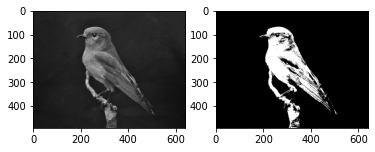

trehshold is 74
cv2 trehshold is 74.0


In [6]:
def my_otsu(image, show_result=False):
    hist = myhist_faster(image,256)
    max_val = -1
    max_tresh = -1
    n1 = 0
    E1 = 0
    E2 = np.sum([i*hist[i] for i in range(256)])
    for t in range(256):
        n1 += hist[t]
        E1 += t*hist[t]
        E2 -= t*hist[t]
        val = n1*(1-n1)*np.power(E1/n1-E2/(1-n1),2)
        if val > max_val:
            max_val = val
            max_tresh = t
    otsu_image = np.copy(image)
    otsu_image[otsu_image<max_tresh] = 0
    otsu_image[otsu_image>= max_tresh] = 1

    if show_result:
            plt.subplot(1, 2, 1)
            plt.imshow(image, cmap='gray')
            plt.subplot(1, 2, 2)
            plt.imshow(otsu_image, cmap='gray')
            plt.show()
    return max_tresh, otsu_image

treshold, _ = my_otsu(gray_I, True)
cv2_treshold, _ = cv2.threshold(gray_I, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(f'trehshold is {treshold}')
print(f'cv2 trehshold is {cv2_treshold}')

